In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 한글폰트 지정
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)

# 스타일 지정
plt.style.use(['ggplot'])

In [4]:
df = pd.read_csv('everytime_reviews__.csv', encoding = 'cp949')

# 전처리

## 빈칸 0으로 채워주기
- 수강 기간이 없는 경우

In [5]:
df = df.fillna(0)

In [6]:
df[df['semester'].isnull() == True]

,category,lecture,professor,review,stars,semester


## 특수문자 제거
- 정규표현식 활용

In [7]:
def delete_not_str(x):    
    if 'A+' in x:
        x = re.sub(r'[^ ㄱ-ㅣ가-힣A-Za-z]', '', x)
        x = x.replace('A', 'A+')
    elif 'B+' in x:
        x = re.sub(r'[^ ㄱ-ㅣ가-힣A-Za-z]', '', x)
        x = x.replace('B', 'B+')
    elif 'C+' in x:
        x = re.sub(r'[^ ㄱ-ㅣ가-힣A-Za-z]', '', x)
        x = x.replace('C', 'C+')
    else:
        x = re.sub(r'[^ ㄱ-ㅣ가-힣A-Za-z]', '', x)
    return x

In [8]:
import re
# 특수문자 제거

df['review'] = df['review'].apply(delete_not_str)

## 글자수 column 추가 & 분포 확인

In [9]:
df['length'] = df['review'].map(lambda x: len(x))

<AxesSubplot:ylabel='Frequency'>

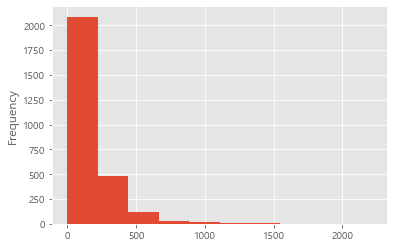

In [10]:
df['length'].plot.hist()

## 단어 빈도수 계산

In [20]:
from konlpy.tag import Kkma
tagger = Kkma()
#tagger.nouns(text)

In [22]:
from collections import Counter
from konlpy.tag import Kkma
tagger = Kkma()

counter = Counter()

def add_counter(text):
    text_n=tagger.nouns(text)
    counter.update(text_n)

df['review'].apply(add_counter)

0       None
1       None
2       None
3       None
4       None
        ... 
2739    None
2740    None
2741    None
2742    None
2743    None
Name: review, Length: 2744, dtype: object

In [32]:
counter.most_common(20)

[('수업', 1529),
 ('교수님', 1283),
 ('시험', 1249),
 ('강의', 1132),
 ('수', 870),
 ('내용', 784),
 ('과제', 735),
 ('학점', 658),
 ('거', 647),
 ('공부', 582),
 ('기말', 579),
 ('시간', 541),
 ('문제', 525),
 ('생각', 521),
 ('중간', 488),
 ('때', 472),
 ('교양', 460),
 ('정도', 435),
 ('학기', 415),
 ('강', 414)]

## 평점 전처리
- width : 80% -> 4점
- width : 100% -> 5점

In [11]:
df['stars'][:5]

0     width: 60%;
1    width: 100%;
2     width: 20%;
3     width: 60%;
4     width: 80%;
Name: stars, dtype: object

In [12]:
# 숫자만 남기기
df['stars'] = df['stars'].apply(lambda x: re.sub(r'[^0-9]','',x))
df['stars'] = df['stars'].apply(lambda x: int(x)//20)

0       3
1       5
2       1
3       3
4       4
       ..
2739    5
2740    4
2741    5
2742    4
2743    5
Name: stars, Length: 2744, dtype: int64

# Visualization

## category 별 리뷰 개수

In [13]:
category_cnt = df.groupby(['category']).count()
category_cnt

,lecture,professor,review,stars,semester,length
category,,,,,,
가치와 윤리,315,315,315,315,315,315
국가와 사회,185,185,185,185,185,185
논리와수리,186,186,186,186,186,186
문학과예술,499,499,499,499,499,499
생명과환경,143,143,143,143,143,143
인간과역사,506,506,506,506,506,506
자연과우주,186,186,186,186,186,186
정보와기술,174,174,174,174,174,174
지역사회와세계,550,550,550,550,550,550


Text(0.5, 1.0, '카테고리 별 개수')

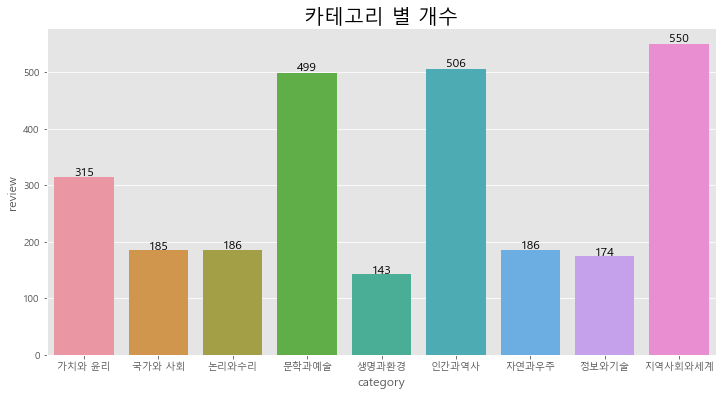

In [14]:
category_cnt = df.groupby(['category']).count()

n 
plt.figure(figsize = (12,6))
x = sns.barplot(
    data = category_cnt,
    x = category_cnt.index,
    y = category_cnt.review)

for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate("%.f"%(height), (left+width/2, height*1.01), ha = 'center',fontsize = 12)
plt.title('카테고리 별 개수', fontsize = 20)

## 강의 별 리뷰 개수

Text(0.5, 1.0, '강의 별 리뷰 개수')

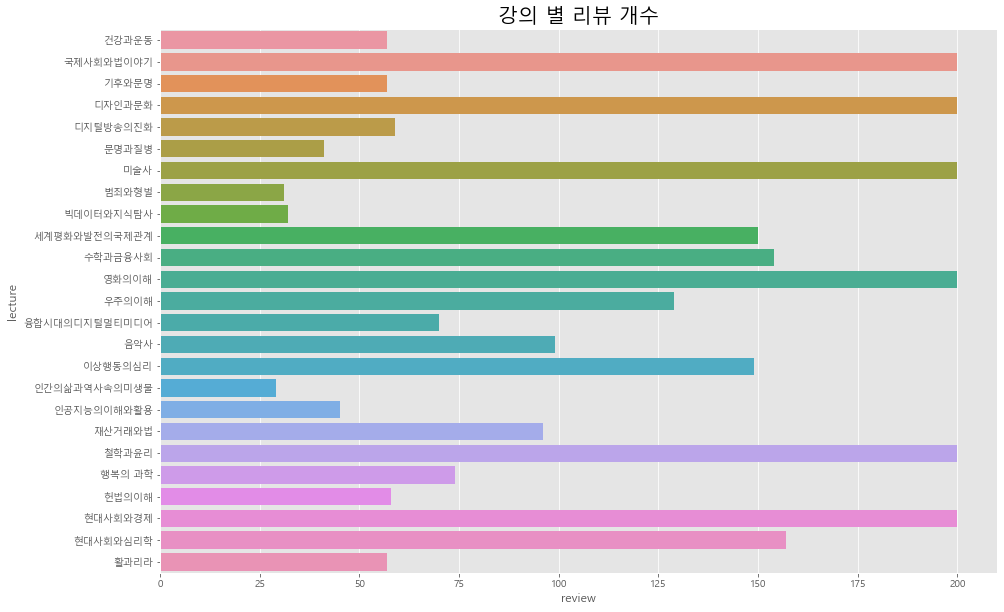

In [15]:
lecture_cnt = df.groupby(['lecture']).count()

plt.figure(figsize = (15,10))
x = sns.barplot(
    data = lecture_cnt,
    y = lecture_cnt.index,
    x = lecture_cnt.review,
    orient = 'h')


#for p in y.patches:
#    left, bottom, width, height = p.get_bbox().bounds
#    plt.annotate("%.f"%(height), (left+width/2, height*1.01), ha = 'center',fontsize = 12)
plt.title('강의 별 리뷰 개수', fontsize = 20)

In [16]:
lecture_cnt = df.groupby(['lecture','semester']).count()
lecture_cnt

category  professor  review  stars  length
lecture semester                                               
건강과운동   15년 1학기 수강자         2          2       2      2       2
        16년 1학기 수강자         3          3       3      3       3
        17년 1학기 수강자        12         12      12     12      12
        18년 1학기 수강자        14         14      14     14      14
        19년 1학기 수강자        15         15      15     15      15
...                       ...        ...     ...    ...     ...
활과리라    17년 1학기 수강자        12         12      12     12      12
        18년 1학기 수강자        14         14      14     14      14
        19년 1학기 수강자        15         15      15     15      15
        20년 1학기 수강자         9          9       9      9       9
        21년 1학기 수강자         2          2       2      2       2

[193 rows x 5 columns]

In [18]:
df.to_csv('everytime_review_pre.csv', index = False)

In [3]:
len(df)

2744